In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [34]:
class Agent:
    def __init__(self, memory_size=2, n_strategies=2, n_actions=2):
        self.memory_size = memory_size
        self.n_strategies = n_strategies
        
        self.strategies = np.random.randint(0, n_actions, (n_strategies, 2**memory_size))
        self.scores = np.zeros(n_strategies)
    
    def choose_action(self, b_history):
        history = self.decimalize_history(b_history)
        eps = np.random.uniform(0, 1, self.n_strategies)
        return self.strategies[np.argmax(self.scores + eps), history]
    
    def update_scores(self, new_state, b_history):
        history = self.decimalize_history(b_history)
        updates = (self.strategies[:, history] == new_state).astype('int32')*2 - 1
        self.scores += updates
    
    def decimalize_history(self, b_history):
        return np.sum([state*(2**i) for i, state in enumerate(reversed(b_history))])

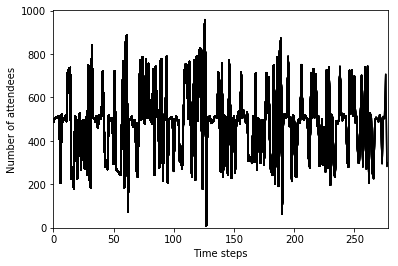

In [35]:
np.random.seed(34)

MEMORY_SIZE  = 4
N_STRATEGIES = 8
N_AGENTS     = 1001
N_TIMESTEPS  = 1000

b_history = np.random.randint(0, 2, MEMORY_SIZE) # [1,0,0]

agents = [Agent(MEMORY_SIZE, N_STRATEGIES) for i in range(N_AGENTS)]
attendance_history = []

for t in range(N_TIMESTEPS):
    try:
        actions   = [agent.choose_action(b_history) for agent in agents]
        new_state = int(np.sum(actions) < N_AGENTS/2) # 0 or 1
        attendance_history.append(np.sum(actions))

        for agent in agents:
            agent.update_scores(new_state, b_history)

        b_history = np.append(b_history, new_state)[-MEMORY_SIZE:]

        plt.plot(np.arange(t+1), attendance_history, color='black')
        plt.xlabel('Time steps')
        plt.ylabel('Number of attendees')
        plt.xlim(0, t)
        plt.ylim(0, N_AGENTS)
        display.display(plt.gcf())
        display.clear_output(wait=True)
    except KeyboardInterrupt:
        break